# Reweighted loss functions for the neural flow diffusion model

## Variational diffusion models

### Definition of the forward process

Let's define the forward process

\begin{align}
    z = \alpha x + \sigma \varepsilon,
    \quad \text{where} \quad
    \alpha^2 + \sigma^2 = 1
\end{align}

Then we have the following connections:

\begin{align}
    x = \frac{z - \sigma \varepsilon}{\alpha}
    \quad \text{and} \quad
    \varepsilon = \frac{z - \alpha x}{\sigma}
\end{align}

### Signal-To-Noise Ratio (SNR)

Introduce the Signal-To-Noise Ratio (SNR)

\begin{align}
    SNR = \frac{\alpha^2}{\sigma^2}
\end{align}

Reparametrization through the gamma function

\begin{align}
    SNR = e^{-\gamma}
\end{align}

Then we can rewrite the $\alpha$ and $\sigma$ coefficients in terms of the gamma function

\begin{align}
    SNR = \frac{\alpha^2}{1 - \alpha^2} = e^{-\gamma}
    \quad \Rightarrow \quad
    \alpha^2 &= \frac{e^{-\gamma}}{1 + e^{-\gamma}} = \frac{1}{1 + e^{\gamma}} = \sigma(-\gamma) \\
    \sigma^2 &= 1 - \alpha^2 = \frac{1}{1 + e^{-\gamma}} = \sigma(\gamma)
\end{align}

### Conditional ODE and SDEs

The conditional ODE is

\begin{align}
    f = \dot{\alpha} x + \dot{\sigma} \varepsilon = \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x)
\end{align}

The conditional score function is

\begin{align}
    s = - \frac{\varepsilon}{\sigma} = \frac{\alpha x - z}{\sigma^2}
\end{align}

Combining the drift of the ODE $f$ and the score function $s$ with the volatility $g$ we can write down the conditional forward SDE

\begin{align}
    d z = f^F d t + g d w, \quad \text{where} \quad f^F = f + \frac{g^2}{2} s
\end{align}

Similarly, we can write down the conditional backward SDE

\begin{align}
    d z = f^B d t + g d \bar{w}, \quad \text{where} \quad f^B = f - \frac{g^2}{2} s
\end{align}

### Derivation of the volatility

In general, the volatility $g$ can be an arbitrary function of time $t$. However, there is one useful consideration that can help us parameterise in a more efficient way.


In diffusion models, we aim to match the distribution of trajectories of the forward and reversed processes. The reverse process is Markovian by design. Therefore, to be able to match the distributions of trajectories, the forward process should also be Markovian. TO guaranry this, we can find such a volatility $g$ that makes the forward process independent on $x$.

I don't know how to derive $g$ analytically in general case, but we can do it in case of the VDM.

\begin{align}
    f^F
    &= f + \frac{g^2}{2} s \\
    &= \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x) + \frac{g^2}{2} \frac{\alpha x - z}{\sigma^2} \\
    &= \underbrace{ \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha + \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) }_{=0} x + \left( \frac{\dot{\sigma}}{\sigma} - \frac{g^2}{2} \frac{1}{\sigma^2} \right) z \\
\end{align}

That gives us the expression for the volatility

\begin{align}
    g^2
    &= 2 \frac{\sigma^2}{\alpha} \left( \frac{\dot{\sigma}}{\sigma} \alpha - \dot{\alpha} \right) \\
    &= 2 \sigma \dot{\sigma} - 2 \sigma^2 \frac{\dot{\alpha}}{\alpha} \\
    &= (\sigma^2)' - 2 (\log \alpha)' \sigma^2
\end{align}

We can also rewrite the volatility in terms of the gamma function

\begin{align}
    g^2
    &= (\sigma^2)' - 2 (\log \alpha)' \sigma^2 \\
    &= (\sigma^2)' - \frac{2 \alpha \dot{\alpha}}{\alpha^2} \sigma^2 \\
    &= (\sigma(\gamma))' - \frac{(\sigma(-\gamma))'}{\sigma(-\gamma)} \sigma(\gamma) \\
    &= \sigma(\gamma) \left( 1 - \sigma(\gamma) \right) \dot{\gamma} + \frac{\sigma(-\gamma) \left( 1 - \sigma(-\gamma) \right) \dot{\gamma}}{\sigma(-\gamma)} \sigma(\gamma) \\
    &= \sigma(\gamma) \dot{\gamma} \left( 1 - \sigma(\gamma) + \underbrace{1 - \sigma(-\gamma)}_{=\sigma(\gamma)} \right) \\
    &= \sigma(\gamma) \dot{\gamma}
\end{align}

To keep the volatility function general, but preserve the connection with the gamma function, we derived, we can reperametrize the volatility function as follows

\begin{align}
    g^2 = \sigma(\gamma) \dot{\gamma} \eta
\end{align}

where $\eta$ is an arbitrary non-negative function of time $t$. If we set $\eta = 1$, we will recover the Markovian volatility.

### Reverse process

We define the reverse process through prediction $\hat{x}(z,t)$ that we substitute into the conditional backward SDE:

\begin{align}
    d z = \hat{f}^B d t + g d \bar{w}, \quad \text{where} \quad \hat{f}^B(z, t) = f^B(z, t, \hat{x}(z,t))
\end{align}


### Derivation of the ELBO

We know that the ELBO of diffusion models is

\begin{align}
    \mathcal{L} = \lambda_{f^B} \left\| f^B - \hat{f}^B \right\|_2^2, \quad \text{where} \quad \lambda_{f^B} = \frac{1}{2 g^2}
\end{align}

For VDM, we can rewrite the $f^B$ as:
\begin{align}
    f^B
    &= f - \frac{g^2}{2} s \\
    &= \dot{\alpha} x + \frac{\dot{\sigma}}{\sigma} (z - \alpha x) - \frac{g^2}{2} \frac{\alpha x - z}{\sigma^2} \\
    &= \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) x + \left( \frac{\dot{\sigma}}{\sigma} + \frac{g^2}{2} \frac{1}{\sigma^2} \right) z
\end{align}

Since the second term doesn't depend on $x$ and will cancel out in the ELBO, we can rewrite the ELBO as:

\begin{align}
    \mathcal{L} = \lambda_x \left\| x - \hat{x} \right\|_2^2
\end{align}

Let's derive the $\lambda_x$ coefficient

\begin{align}
    \lambda_x
    &= \frac{1}{2 g^2} \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right)^2 \\
    &= \frac{1}{2 g^2} \left( \frac{\alpha}{2} \frac{2 \alpha \dot{\alpha}}{\alpha^2} - \frac{\alpha}{2} \frac{2 \sigma \dot{\sigma}}{\sigma^2} - \frac{\alpha}{2} \frac{g^2}{\sigma^2} \right)^2 \\
    &= \frac{1}{2 g^2} \frac{\alpha^2}{2^2} \left( \frac{(\alpha^2)'}{\alpha^2} - \frac{(\sigma^2)'}{\sigma^2} - \frac{g^2}{\sigma^2} \right)^2 \\
    &= \frac{1}{2} \frac{\alpha^2}{\sigma^2} \frac{1}{2^2 \dot{\gamma} \eta} \left( \frac{(\alpha^2)'}{\alpha^2} - \frac{(\sigma^2)'}{\sigma^2} - \frac{\sigma^2 \dot{\gamma} \eta}{\sigma^2} \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( \frac{\sigma(-\gamma) \left( 1 - \sigma(-\gamma) \right) (-1) \dot{\gamma}}{\sigma(-\gamma)} - \frac{\sigma(\gamma) \left( 1 - \sigma(\gamma) \right) \dot{\gamma}}{\sigma(\gamma)} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( \big[ - \underbrace{\left( 1 - \sigma(-\gamma) \right)}_{=\sigma(\gamma)} -  1 + \sigma(\gamma) \big] \dot{\gamma} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{1}{2^2 \dot{\gamma} \eta} \left( - \dot{\gamma} - \dot{\gamma} \eta \right)^2 \\
    &= \frac{1}{2} e^{-\gamma} \frac{ \dot{\gamma}^2 \left( 1 + \eta \right)^2 }{2^2 \dot{\gamma} \eta} \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

Since nothing except the last coefficient depends on function $\eta$, we can see, we can easily find the optimal $\eta$. It is $\eta = 1$. Therefore, the optimal volatility function is a Markovian volatility.

We can also find a nice connection with the SNR function, when $\eta = 1$

\begin{align}
    SNR' = (e^{-\gamma})' = -e^{-\gamma} \dot{\gamma}, \quad \lambda_x = \frac{1}{2} e^{-\gamma} \dot{\gamma} = - \frac{1}{2} SNR'
\end{align}

### Alternative formulations of the ELBO

Similarly, to formulation of the ELBO in terms of the prediction $\hat{f}^B$ or $\hat{x}$, we can rewrite the ELBO in terms of prediction of $\hat{\varepsilon}$

\begin{align}
    x = \frac{z - \sigma \varepsilon}{\alpha}
\end{align}

\begin{align}
    \mathcal{L} = \lambda_\varepsilon \left\| \varepsilon - \hat{\varepsilon} \right\|_2^2
\end{align}

\begin{align}
    \lambda_\varepsilon
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \frac{\sigma^2}{\alpha^2} \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} e^{\gamma} \\
    &= \frac{1}{2} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

When $\eta = 1$, we have

\begin{align}
    \log-SNR' = -\dot{\gamma}, \quad \lambda_\varepsilon = \frac{1}{2} \dot{\gamma} = - \frac{1}{2} \log-SNR'
\end{align}

We can also rewrite the ELBO in terms of the prediction of $\hat{v}$ function (see Appendix D in [this paper](https://arxiv.org/abs/2202.00512))

\begin{align}
    x = \alpha z - \sigma v
\end{align}

\begin{align}
    \mathcal{L} = \lambda_v \left\| v - \hat{v} \right\|_2^2
\end{align}

\begin{align}
    \lambda_v
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \sigma^2 \\
    &= \frac{1}{2} \frac{e^{-\gamma}}{1 + e^{-\gamma}} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \\
    &= \frac{1}{2} \sigma(-\gamma) \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} \\
    &= \frac{1}{2} \alpha^2 \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta}
\end{align}

### Reweighted ELBO formulations

As we know from a lot of papers, diffusion models often have better performance when trained not with the ELBO objective, but with reweighted ELBO functions like:

\begin{align}
    \mathcal{L}_x = \left\| x - \hat{x} \right\|_2^2 = \frac{1}{\lambda_x} \mathcal{L} \quad \text{or} \quad \mathcal{L}_\varepsilon = \left\| \varepsilon - \hat{\varepsilon} \right\|_2^2 = \frac{1}{\lambda_\varepsilon} \mathcal{L}
\end{align}

But what should we do if the model predicts $\hat{x}$ and we want to train a model with $\mathcal{L}_\varepsilon$? We can simply take the $\mathcal{L}_x$ or $\mathcal{L}$ and reweight it!
\begin{align}
    \mathcal{L}_\varepsilon = \frac{\lambda_x}{\lambda_\varepsilon} \mathcal{L}_x = \frac{1}{\lambda_\varepsilon} \mathcal{L}
\end{align}

Importantly, the choice of the reweighting coefficient doesn't depend on the parameterization of the model. We can parameterize the model throgh prediction $\hat{x}$, $\hat{\varepsilon}$, or $\hat{v}$ with same objective function.

## Rewaighted ELBO for NFDM

### General case

In the general case, when the forward process defined as

\begin{align}
    z = F(\varepsilon, t, x),
\end{align}

there is not much we can do. We can rewaight the ELBO with the $\frac{1}{2 g^2}$ coefficient, which is a part of the ELBO, but I'm not sure if it will help. We can also try to rewaight the ELBO with the different $\lambda$ coefficients from VDM. However, since $F$ doesn't have any connections with the SNR, I don't now what such a reweighting can give us.

### Less general case

We can consider the case with a less general forward process

\begin{align}
    z = \alpha F(x, t) + \sigma G(x, t) \varepsilon
\end{align}

This is a Gaussian forward process and it does have a connection with the SNR function. Therefore, we can reweight the ELBO with the $\lambda$ coefficients from VDM. If $F=x$ and $G=1$, we will recover exactly the VDM case.

### NDM

We can simplify the forward process a bit more and consider the NDM case

\begin{align}
    z = \alpha F(x, t) + \sigma \varepsilon
\end{align}

For this case, the same logic applies. We can take the true ELBO and reweight it with the $\lambda$ coefficients from VDM. However, in this case we can even slightly simplify the calculations. Let's write down the ELBO for the NDM:

\begin{align}
    f^B
    &= f - \frac{g^2}{2} s \\
    &= \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) - \frac{g^2}{2} \frac{\alpha F - z}{\sigma^2} \\
    &= \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) F + \alpha \dot{F} + \left( \frac{\dot{\sigma}}{\sigma} + \frac{g^2}{2} \frac{1}{\sigma^2} \right) z
\end{align}

\begin{align}
    \mathcal{L} 
    &= \frac{1}{2 g^2} \left\| f^B - \hat{f}^B \right\|_2^2 \\
    &= \frac{1}{2 g^2} \left\| \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) \left( F - \hat{F} \right) + \alpha \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \frac{1}{g} \left( \dot{\alpha} - \frac{\dot{\sigma}}{\sigma} \alpha - \frac{g^2}{2} \frac{\alpha}{\sigma^2} \right) \left( F - \hat{F} \right) + \frac{\alpha}{g} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \sqrt{2 \lambda_x} \left( F - \hat{F} \right) + \frac{\alpha}{g} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| \sqrt{2 \lambda_x} \left( F - \hat{F} \right) + \frac{\alpha}{\sigma} \frac{\sqrt{\dot{\gamma}}}{\dot{\gamma}} \frac{\sqrt{\eta}}{\eta} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} \left\| e^{-\frac{\gamma}{2}} \sqrt{\dot{\gamma}} \frac{ 1 + \eta }{2} \frac{\sqrt{\eta}}{\eta} \left( F - \hat{F} \right) + e^{-\frac{\gamma}{2}} \frac{\sqrt{\dot{\gamma}}}{\dot{\gamma}} \frac{\sqrt{\eta}}{\eta} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta} \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \lambda_F \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2, \quad \text{where} \quad \lambda_F = \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta}
\end{align}

Importantly, $\eta = 1$ doesn't necessarily minimises the ELBO in this case.

Therefore, if we want to train the NDM with $\mathcal{L}_x$ objective, we can do it as follows

\begin{align}
    \mathcal{L}_x
    &= \frac{1}{\lambda_x} \mathcal{L} \\
    &= \frac{\lambda_F}{\lambda_x} \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{ \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{1}{\eta} }{ \frac{1}{2} e^{-\gamma} \dot{\gamma} \frac{ \left( 1 + \eta \right)^2 }{2^2 \eta} } \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2 \\
    &= \frac{ 2^2 }{ \left( 1 + \eta \right)^2 } \left\| \frac{ 1 + \eta }{2} \left( F - \hat{F} \right) + \frac{1}{\dot{\gamma}} \left( \dot{F} - \dot{\hat{F}} \right) \right\|_2^2
\end{align}

## Implementation

### Imports and utils

In [32]:
from abc import ABC, abstractmethod
from typing import Callable, Optional

import numpy as np

import torch
from torch import nn, Tensor
from torch.nn import functional as F
import torch.distributions as D

import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [33]:
class Net(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(in_dim, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, 64),
            nn.SELU(),
            nn.Linear(64, out_dim),
        )

    def forward(self, t: Tensor) -> Tensor:
        return self.net(t)

In [34]:
@torch.no_grad()
def solve_sde(
        sde: Callable[[Tensor, Tensor], tuple[Tensor, Tensor]],
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=False
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps[:-1]):
        t = t.expand(bs, 1)

        f, g = sde(z, t)

        w = torch.randn_like(z)
        z = z + f * dt + g * w * dt_2

        path.append(z)

    return z, (t_steps, torch.stack(path))

In [35]:
class TimeSampler(nn.Module, ABC):
    def __init__(self, salt_fraction: Optional[int] = None):
        super().__init__()

        self._salt_fraction = salt_fraction

    @abstractmethod
    def prob(self, t: Tensor) -> Tensor:
        raise NotImplementedError

    @abstractmethod
    def sample(self, bs: int) -> Tensor:
        raise NotImplementedError

    def loss(self, loss: Tensor, t: Tensor) -> Tensor:
        """
        In terms of minimization of the variance, this loss is not quite correct. Firstly, in lit module,
        we detach t and loss. Theoretically we should differentiate end-to-end through loss to obtain
        the true gradient w.r.t. parameters of the proposal distribution. However, to do this, we must
        differentiate through the training step second time just to optimize the proposal distribution,
        which is too expensive. Therefore, we detach t and loss and work with biased gradient. Secondly,
        we should take into account the salting, which we don't.
        """

        p = self.prob(t)

        l2 = loss ** 2
        p2 = p ** 2

        return l2 / p2

    def forward(self, bs: int) -> tuple[Tensor, Tensor]:
        t = self.sample(bs)

        dtype = t.dtype
        device = t.device

        if self._salt_fraction is not None:
            assert bs % self._salt_fraction == 0

            bs2 = bs // self._salt_fraction
            bs1 = bs - bs2

            un = D.Uniform(
                torch.tensor([0.], dtype=dtype, device=device),
                torch.tensor([1.], dtype=dtype, device=device)
            )
            u = un.sample(torch.Size((bs2,)))

            t = torch.cat([t[:bs1], u], dim=0)

            p = self.prob(t)

            k = 1 / self._salt_fraction
            p = p * (1 - k) + k
        else:
            p = self.prob(t)

        return t, p


class UniformSampler(TimeSampler):
    def __init__(self, salt_fraction: Optional[int] = None):
        super().__init__(salt_fraction)

        self.register_buffer("_l", torch.tensor(0.))
        self.register_buffer("_r", torch.tensor(1.))

    @property
    def _u(self) -> D.Uniform:
        return D.Uniform(self._l, self._r)

    def prob(self, t: Tensor) -> Tensor:
        return self._u.log_prob(t).squeeze(dim=1).exp()

    def sample(self, bs: int) -> Tensor:
        return self._u.sample(torch.Size((bs, 1)))


class BucketSampler(TimeSampler):
    def __init__(self, n: int = 100, salt_fraction: Optional[int] = None):
        super().__init__(salt_fraction)

        self._logits = nn.Parameter(torch.ones(n))

    @property
    @abstractmethod
    def _bucket_prob(self) -> Tensor:
        raise NotImplementedError

    @property
    @abstractmethod
    def _bucket_width(self) -> Tensor:
        raise NotImplementedError

    @property
    def _bucket_height(self) -> Tensor:
        return self._bucket_prob / self._bucket_width

    @property
    def _bucket_bounds(self) -> tuple[Tensor, Tensor]:
        w = self._bucket_width

        dtype = w.dtype
        device = w.device

        b_r = torch.cumsum(w, dim=0)
        b_l = torch.cat([torch.zeros(1, dtype=dtype, device=device), b_r[:-1]])

        return b_l, b_r

    def prob(self, t: Tensor) -> Tensor:
        t = t.flatten()

        t, ids_t = torch.sort(t)
        inv_ids_t = torch.argsort(ids_t)

        b_l, _ = self._bucket_bounds

        ids_p = torch.searchsorted(b_l, t, right=True) - 1

        p = self._bucket_height
        p = torch.index_select(p, 0, ids_p)
        p = torch.index_select(p, 0, inv_ids_t)

        return p

    def sample(self, bs: int) -> Tensor:
        b_p = self._bucket_prob
        b_l, b_r = self._bucket_bounds

        dtype = b_p.dtype
        device = b_p.device

        cat = D.Categorical(b_p)
        ids = cat.sample(torch.Size((bs,)))

        un = D.Uniform(
            torch.tensor(0., dtype=dtype, device=device),
            torch.tensor(1., dtype=dtype, device=device)
        )
        u = un.sample(torch.Size((bs,)))

        t = torch.index_select(b_l, 0, ids) + torch.index_select(b_r - b_l, 0, ids) * u
        t = t[:, None]

        return t


class UniformBucketSampler(BucketSampler):
    @property
    def _bucket_prob(self) -> Tensor:
        logits = self._logits
        logits = torch.clamp(logits, min=-10, max=10)

        return torch.softmax(logits, dim=0)

    @property
    def _bucket_width(self) -> Tensor:
        logits = self._logits
        dtype = logits.dtype
        device = logits.device
        n = logits.shape[0]
        return torch.ones(n, dtype=dtype, device=device) / n

In [36]:
def viz_2d_data(data: Tensor):
    plt.scatter(data[:, 0], data[:, 1], s=1)
    plt.axis("scaled")
    plt.show()

In [37]:
def viz_2d_path(t_steps: Tensor, path: Tensor, n_lines: int=-1, color: str | None=None):
    plt.figure(figsize=(12, 12))
    plt.scatter(15 + path[0, :, 0], path[0, :, 1], s=1)
    plt.scatter(path[-1, :, 0], path[-1, :, 1], s=1)
    plt.plot(15 * t_steps[:, None] + path[:, :n_lines, 0],
             path[:, :n_lines, 1],
             color=color, alpha=0.5)
    plt.axis("scaled")
    plt.tick_params(left=False, labelleft=False,
                    bottom=False, labelbottom=False)
    plt.show()

In [38]:
def gen_data(n: int):
    scale = 4.
    centers = torch.tensor([
        [1, 0],
        [-1, 0],
        [0, 1],
        [0, -1],
        [1. / np.sqrt(2), 1. / np.sqrt(2)],
        [1. / np.sqrt(2), -1. / np.sqrt(2)],
        [-1. / np.sqrt(2), 1. / np.sqrt(2)],
        [-1. / np.sqrt(2), -1. / np.sqrt(2)]
    ], dtype=torch.float32)
    centers = scale * centers

    x = torch.randn(n, 2)
    x = 0.5 * x

    center_ids = torch.randint(0, 8, (n,))
    x = x + centers[center_ids]

    x = x / 2 ** 0.5

    return x

# generates data of dimension 2
data = gen_data(10)
print(data)

tensor([[-0.0328, -3.3647],
        [ 2.2037, -2.4361],
        [ 2.1881,  2.0950],
        [ 1.8443, -2.1616],
        [ 1.7488, -2.1490],
        [-2.3779, -0.3095],
        [ 1.8109,  2.4055],
        [ 1.3435, -1.5730],
        [ 0.3798,  3.3003],
        [ 0.6407,  2.9361]])


### Forward process

In [39]:
def jvp(f, x, v):
    return torch.autograd.functional.jvp(
        f, x, v,
        create_graph=torch.is_grad_enabled()
    )

def t_dir(f, t):
    return jvp(f, t, torch.ones_like(t))

In [40]:
class AffineTransform(nn.Module, ABC):
    @abstractmethod
    def get_m_s(self, x: Tensor, t: Tensor) -> tuple[Tensor, Tensor]:
        raise NotImplementedError

    def forward(self, x: Tensor, t: Tensor) -> tuple[tuple[Tensor, Tensor], tuple[Tensor, Tensor]]:
        def f(t_in):
            return self.get_m_s(x, t_in)

        return t_dir(f, t)

In [41]:
class AffineTransformID(AffineTransform):
    @staticmethod
    def get_m_s(x, t):
        m = x
        s = torch.ones_like(x)
        return m, s

    @staticmethod
    def forward(x, t): # this is VDM. 
        m, s = AffineTransformID.get_m_s(x, t)

        dm = torch.zeros_like(x)
        ds = torch.zeros_like(x)

        return (m, s), (dm, ds)


class AffineTransformHalfNeural(AffineTransform):
    def __init__(self, d: int):
        super().__init__()

        self.net = Net(d, d)

    def get_m_s(self, x, t):
        #x_t = torch.cat([x, t], dim=1)
        m = self.net(x)

        #m = x + t * m
        s = torch.ones_like(x)

        return m, s

In [42]:
class Gamma(nn.Module, ABC):
    @staticmethod
    def alpha_2(g):
        return torch.sigmoid(-g)

    @staticmethod
    def sigma_2(g):
        return torch.sigmoid(g)

    @abstractmethod
    def get_gamma(self, t: Tensor) -> Tensor:
        raise NotImplementedError

    def forward(self, t: Tensor) -> tuple[Tensor, Tensor]:
        return t_dir(self.get_gamma, t)

In [43]:
class GammaLinear(Gamma):
    @staticmethod
    def get_gamma(t):
        return -10 + 20 * t

    @staticmethod
    def forward(t):
        g = GammaLinear.get_gamma(t)
        dg = torch.ones_like(t) * 20
        return g, dg

In [44]:
class GammaBad(Gamma):
    def __init__(self):
        super().__init__()

    def get_gamma(self, t):
        #return -13.3 + 18.3 * (1 / (1 + torch.exp(-5 * (t-0.5)))) #
        return -10 + 30 * (1 / (1 + torch.exp(-50 * (t - 0.999))))

In [45]:
class PosLinear(nn.Linear):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.sp = nn.Softplus()

    def forward(self, x: Tensor) -> Tensor:
        weight = self.sp(self.weight)
        bias = self.bias
        return F.linear(x, weight, bias)


class GammaVDM(Gamma):
    def __init__(self):
        super().__init__()

        self.fc1 = PosLinear(1, 1)
        self.fc2 = PosLinear(1, 1024)
        self.fc3 = PosLinear(1024, 1)

    def get_unnorm_gamma(self, x):
        x = self.fc1(x)

        y = self.fc2(x)
        y = torch.sigmoid(y)
        y = self.fc3(y)

        return x + y

    def get_gamma(self, t):
        x_0 = torch.zeros(1, 1)
        x_1 = torch.ones(1, 1)
        y_0 = torch.ones(1, 1) * (-10)
        y_1 = torch.ones(1, 1) * 10 #flag
        y_gap = y_1 - y_0

        x_adj = torch.cat([x_0, x_1, t], dim=0)
        y_adj = self.get_unnorm_gamma(x_adj)
        yo_0, yo_1, yo = y_adj[:1], y_adj[1:2], y_adj[2:]

        y = y_0 + (y_1 - y_0) * (yo - yo_0) / (yo_1 - yo_0)

        return y

In [46]:
class GammaTheirs(Gamma):
    def __init__(self):
        super().__init__()

    def get_reference_gamma(self, t):
        s = (0.99-t) * 0.0001
        sqrt = torch.sqrt(t+s)
        gamma = torch.log(1/(1-sqrt) - 1)
        return gamma


In [47]:
class VolatilityEta(nn.Module, ABC):
    @abstractmethod
    def forward(self, t: Tensor) -> Tensor:
        raise NotImplementedError

In [48]:
class VolatilityEtaOne(nn.Module):
    def forward(self, t):
        return torch.ones_like(t)


class VolatilityEtaNeural(nn.Module, ABC):
    def __init__(self):
        super().__init__()

        self.net = Net(1, 1)
        self.sp = nn.Softplus()

    def forward(self, t):
        return self.sp(self.net(t))

class VolatilityEtaOneNew(nn.Module):
    def forward(self, t):
        return torch.ones(t.size(0), 2)
#vol = VolatilityEtaOneNew()
#print(vol(torch.tensor([1,2,4,5,6,7,54,2,3,4,5,6])))

### Reverse process

In [49]:
class Predictor(nn.Module):
    def __init__(self, d: int):
        super().__init__()

        self.net = Net(d + 1, d)

    def forward(self, z, t):
        z_t = torch.cat([z, t], dim=1)
        x = self.net(z_t)

        x = (1 - t) * z + (t + 0.01) * x

        return x

### Neural diffusion

In [50]:
class NeuralDiffusion(nn.Module):
    def __init__(self, transform: AffineTransform, gamma: Gamma, vol_eta: VolatilityEta, pred: Predictor):
        super().__init__()

        self.transform = transform
        self.gamma = gamma
        self.vol_eta = vol_eta
        self.pred = pred
        #self.scalar = nn.Parameter(torch.tensor([1.0]))

    def forward(self, x: Tensor, t: Tensor):
    
        eps = torch.randn_like(x)

        # Check if eps contains NaNs or Infs
        if torch.any(torch.isnan(eps)) or torch.any(torch.isinf(eps)):
            print(f"NaN or Inf detected in eps: {eps}")

        gamma, d_gamma = self.gamma(t)

        # Check gamma and d_gamma for NaNs and Infs
        if torch.any(torch.isnan(gamma)) or torch.any(torch.isinf(gamma)):
            print(f"NaN or Inf detected in gamma: {gamma}")

        if torch.any(torch.isnan(d_gamma)) or torch.any(torch.isinf(d_gamma)): # or torch.any(d_gamma < 0.000001):
            print(f"NaN or Inf detected in d_gamma: {d_gamma}")
        
        alpha = self.gamma.alpha_2(gamma) ** 0.5
        sigma = self.gamma.sigma_2(gamma) ** 0.5

        # Check alpha and sigma for NaNs or Infs
        if torch.any(torch.isnan(alpha)) or torch.any(torch.isinf(alpha)):
            print(f"NaN or Inf detected in alpha: {alpha}")
        if torch.any(torch.isnan(sigma)) or torch.any(torch.isinf(sigma)):
            print(f"NaN or Inf detected in sigma: {sigma}")

        (m, _), (d_m, _) = self.transform(x, t)

        # Check m, d_m for NaNs or Infs
        if torch.any(torch.isnan(m)) or torch.any(torch.isinf(m)):
            print(f"NaN or Inf detected in m: {m}")
        if torch.any(torch.isnan(d_m)) or torch.any(torch.isinf(d_m)):
            print(f"NaN or Inf detected in d_m: {d_m}")

        eta = self.vol_eta(t)

        # Check eta for NaNs or Infs
        if torch.any(torch.isnan(eta)) or torch.any(torch.isinf(eta)):
            print(f"NaN or Inf detected in eta: {eta}")

        z = alpha * m + sigma * eps

        # Check z for NaNs or Infs
        if torch.any(torch.isnan(z)) or torch.any(torch.isinf(z)):
            print(f"NaN or Inf detected in z: {z}")

        x_ = self.pred(z, t)

        # Check x_ for NaNs or Infs
        if torch.any(torch.isnan(x_)) or torch.any(torch.isinf(x_)):
            print(f"NaN or Inf detected in x_: {x_}")

        (m_, _), (d_m_, _) = self.transform(x_, t)

        # Check m_, d_m_ for NaNs or Infs
        if torch.any(torch.isnan(m_)) or torch.any(torch.isinf(m_)):
            print(f"NaN or Inf detected in m_: {m_}")
        if torch.any(torch.isnan(d_m_)) or torch.any(torch.isinf(d_m_)):
            print(f"NaN or Inf detected in d_m_: {d_m_}")

        # ELBO weighting
        lmbd = 0.5 * torch.exp(-gamma) * d_gamma / eta
        #lmbd = 0.5 * torch.exp(-self.scalar * gamma) * d_gamma / eta
        #lmbd = 0.5 * 8 / eta
        #print(lmbd)

        
        #lmbd = 0.5 * d_gamma / eta
        #print("exp gamma is : ", torch.exp(-gamma))
        #print("d_gamma is : ", d_gamma)

        # Check lmbd for NaNs or Infs
        if torch.any(torch.isnan(lmbd)) or torch.any(torch.isinf(lmbd)):
            print(f"NaN or Inf detected in lmbd: {lmbd}")

        # L_x weighting (optional, commented out)
        #lmbd = (4 / (1 + eta) ** 2) 
        #print("lmbd is: ", lmbd) #should just be 1, it is
        one_over_dgamma = torch.clamp(1 / (d_gamma), max=10000) 
        if torch.any(one_over_dgamma == 10000):
            print("clamped")
        
        #print("one_over_dgamma is: ", one_over_dgamma) #should just be 1, it is

        loss = (1 + eta) / 2 * (m - m_) + (1/d_gamma) * (d_m - d_m_)

        #print(d_gamma[d_gamma < 0.000001], "dgamma")
        #print(one_over_dgamma[d_gamma < 0.000001])
        #print(d_m-d_m_, "should be zero")
        #print(one_over_dgamma*(d_m - d_m_), "should be zero")
    
        #print("unscaled loss is: ", loss)

        # Check intermediate loss for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in loss before squaring: {loss}")

        loss = loss ** 2

        # Check squared loss for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in squared loss: {loss}")

        # Stabilises training
        #loss_x = (1 + eta) ** 2 / 4 * (x - x_) ** 2

        # Check loss_x for NaNs or Infs
        #if torch.any(torch.isnan(loss_x)) or torch.any(torch.isinf(loss_x)):
        #    print(f"NaN or Inf detected in loss_x: {loss_x}")

        #loss = 0.5 * loss + 0.5 * loss_x

        # Check final loss before applying lambda for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in final loss before lambda: {loss}")

        loss = lmbd * loss 

        # Check final loss after applying lambda for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in final loss: {loss}")

        # Optionally, you can add assertions here to ensure that no NaN or Inf values propagate.
        assert not torch.any(torch.isnan(loss)), f"NaN detected in final loss: {loss}"
        assert not torch.any(torch.isinf(loss)), f"Inf detected in final loss: {loss}"

        loss = loss.sum(dim=1)
        #print(loss.shape)

        # Check final loss sum for NaNs or Infs
        if torch.any(torch.isnan(loss)) or torch.any(torch.isinf(loss)):
            print(f"NaN or Inf detected in loss after summing: {loss}")

        return loss


### Training

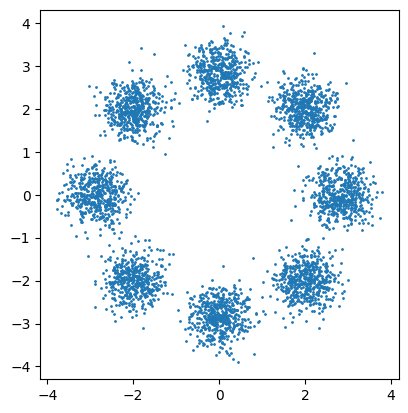

In [51]:
data_sample = gen_data(2 ** 12)

viz_2d_data(data_sample)

In [52]:
def train(model, time_sampler, gen_data_f):
    iter = 10 ** 5
    bs = 2 ** 10

    #set lr higher for model.gamma than for the rest using param group

    optim = torch.optim.Adam([*model.parameters(), *time_sampler.parameters()], lr=1e-3)

    pbar = trange(iter)
    for i in pbar:
        x = gen_data_f(bs)

        t, p = time_sampler(bs=bs)
        t, p = t.detach(), p.detach()

        loss = model(x, t)
        loss = loss / p + time_sampler.loss(loss.detach(), t)

        # plt.scatter(t[:, 0], loss.detach().numpy(), s=1)
        # plt.scatter(t[:, 0], p.detach().numpy(), s=1)
        # plt.show()

        loss = loss.mean()

        if (i + 1) % 100 == 0:
            pbar.set_description(f"{loss.item():.4f}")

        optim.zero_grad()
        loss.backward()
        optim.step()

In [53]:
transform = AffineTransformID()
#transform = AffineTransformHalfNeural(d=2)

#gamma = GammaLinear()
gamma = GammaVDM()
#gamma = GammaBad()
#gamma = GammaMuLAN(mulan_config)
#gamma = GammaMuLANtDir(mulan_config)
#gamma = GammaARReversed(mulan_config)

vol_eta = VolatilityEtaOne()
#vol_eta = VolatilityEtaNeural()

pred = Predictor(d=2)

ndm = NeuralDiffusion(transform, gamma, vol_eta, pred)

time_sampler = UniformBucketSampler()
#time_sampler = UniformSampler()

train(model=ndm, time_sampler=time_sampler, gen_data_f=gen_data)

214.2056:  66%|██████▌   | 65916/100000 [22:12<11:28, 49.47it/s]  


KeyboardInterrupt: 

### Train MuLAN

\begin{align}
f^B = \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) - \frac{g^2}{2} \frac{\alpha F - z}{\sigma^2} \\
\end{align}

## Visualisation

### SDE Sampling

tensor([[-1.5212, -1.8021],
        [-0.5806,  2.5353],
        [ 0.2834,  2.4214],
        ...,
        [ 1.4364,  1.8085],
        [-0.2080, -2.6007],
        [-3.0549, -0.5932]])


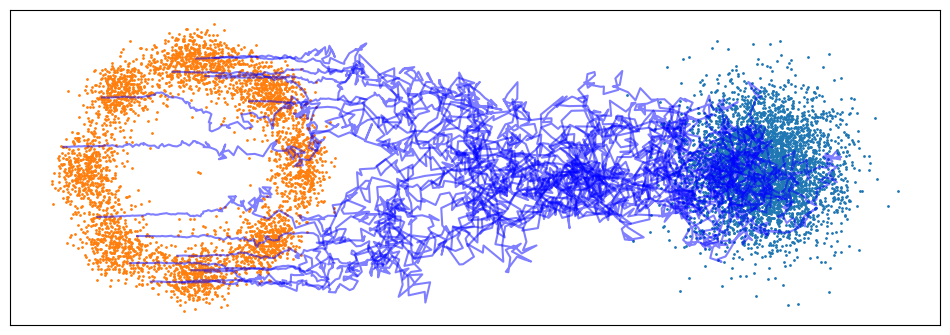

In [ ]:
bs = 2 ** 12

z = torch.randn(bs, 2)


def sde(z_in, t_in):
    gmm, d_gmm = gamma(t_in)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5
    sigma = sigma_2 ** 0.5 #I added this 

    #print(gmm, "gmm")
    #print(d_gmm, "d_gmm")
    #print(alpha_2, "alpha_2")
    #print(sigma_2, "sigma_2")
    #print(alpha, "alpha")
    #print(sigma, "sigma")

    eta = vol_eta(t_in)

    g = (sigma_2 * d_gmm * eta) ** 0.5

    x_ = pred(z_in, t_in)

    (m_, _), (d_m_, _) = transform(x_, t_in)

    #print(d_m_, "d_m")
    #print(sigma_2, "sigma2")
    #print(eta, "eta")
    #print(d_gmm, "d_gmm")
    #print(g, "g")

    #drift = -alpha * d_gmm * (1 + eta) / 2 * m_ + \
    #        alpha * d_m_ + \
    #        0.5 * d_gmm * (alpha_2 + eta) * z_in
    eps = (z_in - alpha * m_) / sigma
    alpha_prime = - d_gmm * 0.5 * alpha * (1- alpha_2) 
    sigma_prime = 0.5 * d_gmm * sigma * (1 - sigma_2)
    #dz = -alpha * d_gmm + alpha * d_m_ + sigma * d_gmm * eps
    dz = alpha_prime * m_ + alpha * d_m_ + sigma_prime * eps
    drift = dz - 0.5 * (g ** 2) * ((alpha * m_ - z_in) / sigma_2)

    #print(eps, "eps")
    #print(alpha_prime, "alpha_prime")
    #print(sigma_prime, "sigma_prime")
    #print(dz, "dz")
    #print(drift, "drift")

    return drift, g


_, (t_steps, path) = solve_sde(sde=sde, z=z, ts=1, tf=0, n_steps=300)

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

### Star Diffusion

In [24]:
def denoised_fn(x, t):
    pass

100%|██████████| 301/301 [00:06<00:00, 50.00it/s]


tensor([[ 0.1461,  3.2806],
        [ 0.6517,  2.7345],
        [ 1.6339, -1.6711],
        ...,
        [ 3.1366,  0.4165],
        [ 0.0782, -3.1797],
        [-0.1629, -3.2138]])


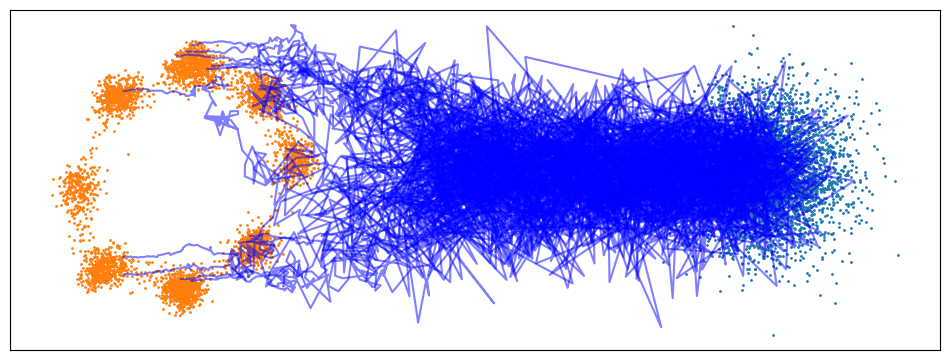

In [25]:
def predicting_part(prev_sample, t, denoised_fn):
    def process_xstart(x):
        if denoised_fn is not None:
            # print(denoised_fn)
            x = denoised_fn(x, t)
        if False:# clip_denoised:
            return x.clamp(-1, 1)
        return x
    
    out = {}
    x_ = pred(prev_sample, t) 
    
    x_start = process_xstart(x_)
    out["pred_xstart"] = x_start

    gmm, _ = gamma(t)
    alpha = gamma.alpha_2(gmm) ** 0.5
    sigma2 =  gamma.sigma_2(gmm)

    m, _ = transform.get_m_s(x_start, t)

    out["mean"] = alpha*m
    out["log_variance"] = torch.log(sigma2)


    noise = torch.randn_like(prev_sample)
    nonzero_mask = (
        (t != 0).float().view(-1, *([1] * (len(prev_sample.shape) - 1)))
    )  # no noise when t == 0
    sample = out["mean"] + nonzero_mask * torch.exp(0.5 * out["log_variance"]) * noise 
    return sample

@torch.no_grad()
def discrete_sampling_star(
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=True
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)#[:-1]
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps):
        t = t.expand(bs, 1)

        z = predicting_part(prev_sample=z, t=t, denoised_fn=None)

        path.append(z)

    return z, (t_steps, torch.stack(path[:-1]))


bs = 2 ** 12

z = torch.randn(bs, 2)

_, (t_steps, path) = discrete_sampling_star(z=z, ts=1, tf=0, n_steps=300)

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

### Correct Marginal Sampling

\begin{align}
    z_t = F(\varepsilon, t, x)
\end{align}

Then given z_t and t (n(0,1) noise and t=1), do:

1. x_0 prediction, $$x\_ = model.pred(z_t, t)$$
2. get epsilon by inverse big F, $$\varepsilon = \frac{(z - \alpha F) }{\sigma}$$
3. get epsilon s|t, 

\begin{align}
    \tilde{\varepsilon}_{s|t} = \sqrt{1- \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon}
\end{align}

where,

\begin{align}
    \tilde{\sigma}_{s|t} = \sigma_s^2 - \frac{SNR(t)}{SNR(s)}\sigma_s^2
\end{align}

and,

\begin{align}
 \tilde{\varepsilon} - N(0,1)? 
\end{align}
because otherwise no new noise would be injected


4. get z_s (next z) by feeding through the forward process. 
\begin{align}
    z = F(\tilde{\varepsilon}_{s|t}, s, x)
\end{align}

\begin{align}
    z = \alpha_s F + \sigma_s (\sqrt{1- \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon})
\end{align}

but that doesnt match the ndm appendix 1 I think? and it doesnt lead to a marginalized standard deviation of sigma_s, which would instead need,

\begin{align}
    z = \alpha_s F + (\sqrt{\sigma_s^2 - \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon})
\end{align}

which I suppose you could also write as 
\begin{align}
    \tilde{\varepsilon}_{s|t} = \frac{1}{\sigma^2_s}(\sqrt{\sigma^2_s- \tilde{\sigma}^2_{s|t}} \varepsilon + \tilde{\sigma}_{s|t} \tilde{\varepsilon})
\end{align}



  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:13<00:00, 22.16it/s]


tensor([[ 2.7421,  0.8619],
        [ 0.1974, -2.4164],
        [-2.9109,  2.9021],
        ...,
        [ 1.2817,  2.1491],
        [ 0.8874,  2.8283],
        [-2.4476,  0.5205]])


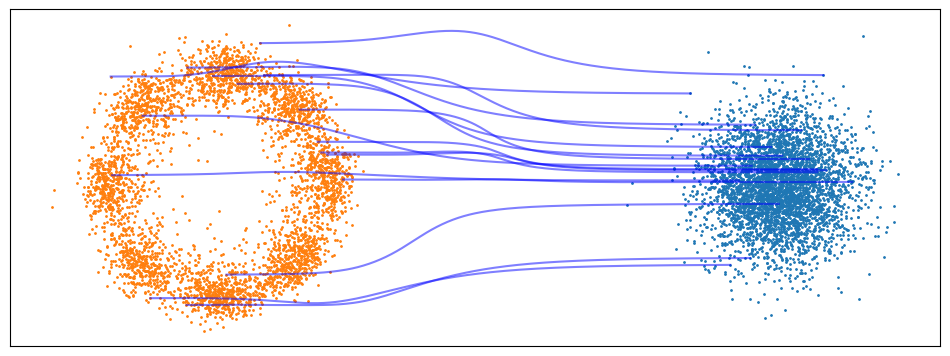

In [ ]:
def get_next_marginal(prev_sample, t, s, denoised_fn):
    def process_xstart(x):
        if denoised_fn is not None:
            # print(denoised_fn)
            x = denoised_fn(x, t)
        if False:# clip_denoised:
            return x.clamp(-1, 1)
        return x
    
    #step 1 do prediction 
    x_ = pred(prev_sample, t) 
    
    x_start = process_xstart(x_)

    #step 2 get epsilon
    gmm, _ = gamma(t)
    alpha2 = gamma.alpha_2(gmm)
    sigma2 =  gamma.sigma_2(gmm)
    alpha = alpha2 ** 0.5
    sigma = sigma2 ** 0.5

    m_ , _ = transform.get_m_s(x_start, t)

    eps = (prev_sample - alpha * m_) / sigma

    #step 3 get epsilon s|t
    #we need stepsize for this?
    noise = torch.randn_like(prev_sample)
    gmm_s, _ = gamma(s)
    alpha2_s = gamma.alpha_2(gmm_s)
    sigma2_s =  gamma.sigma_2(gmm_s)
    alpha_s = alpha2_s ** 0.5
    sigma_s = sigma2_s ** 0.5
    
    m_s , _ = transform.get_m_s(x_start, s)

    #print(gmm_s)
    snr_t = (alpha2/sigma2).double()
    snr_s = (alpha2_s/sigma2_s).double()

    #sigma2_tilde_s_t = (1 -  (snr_t / snr_s)).float() #instead of casting back to float here we can alos cast back only after computing epsilon tilde st
    sigma2_tilde_s_t = -torch.expm1(gmm_s - gmm) #should be in 0-1
    #sigma2_tilde_s_t = 1 + torch.expm1(gmm_s - gmm) #should be in 0-1
    #print(sigma2_tilde_s_t, "sigma2_tilde_s_t")
    sigma2_tilde_s_t = torch.zeros_like(sigma2_tilde_s_t)

    #or option 3
    epsilon_tilde_s_t = torch.sqrt(1 - sigma2_tilde_s_t) * eps + (sigma2_tilde_s_t.sqrt()) * noise 

    #print("snr_t", snr_t[0])
    #print("snr_s", snr_s[0])
    #print("sigma", sigma2_tilde_s_t) #this should be positive always but isnt so im doing something wrong. 

    #step 4 get z_s
    sample = alpha_s * m_s + sigma_s * epsilon_tilde_s_t
    
    #if we want to match appendix 1 of ndm paper I think it should instead be
    #sample = alpha_s * m_s +  torch.sqrt(sigma2 - sigma2_tilde_s_t) * eps + (sigma2_tilde_s_t ** 0.5) * noise

    return sample

@torch.no_grad()
def discrete_sampling(
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=True
):
    bs = z.shape[0]

    t_steps = torch.linspace(ts, tf, n_steps + 1)#[:-1]
    dt = (tf - ts) / n_steps
    dt_2 = abs(dt) ** 0.5

    path = [z]
    pbar = tqdm if show_pbar else (lambda a: a)
    for t in pbar(t_steps[:-1]):
        t = t.expand(bs, 1)

        #I understand I am doing 2x-1 the number of needed forward pass through gamma now, Ill fix that before putting it into the actual code.        
        z = get_next_marginal(prev_sample=z, t=t, s=t+dt, denoised_fn=None)

        path.append(z)

    return z, (t_steps, torch.stack(path))


bs = 2 ** 12

z = torch.randn(bs, 2)

_, (t_steps, path) = discrete_sampling(z=z, ts=1, tf=0, n_steps=300)

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

## correct sampling algo 

tensor(0.9967) tensor(0.)


  0%|          | 0/299 [00:00<?, ?it/s]

100%|██████████| 299/299 [00:12<00:00, 23.29it/s]


300
300
tensor([[-0.4909,  2.6372],
        [-2.6852,  0.3357],
        [ 2.1983,  2.2941],
        ...,
        [ 1.9561, -1.6702],
        [-2.6448,  0.3202],
        [-2.8487, -0.2518]])


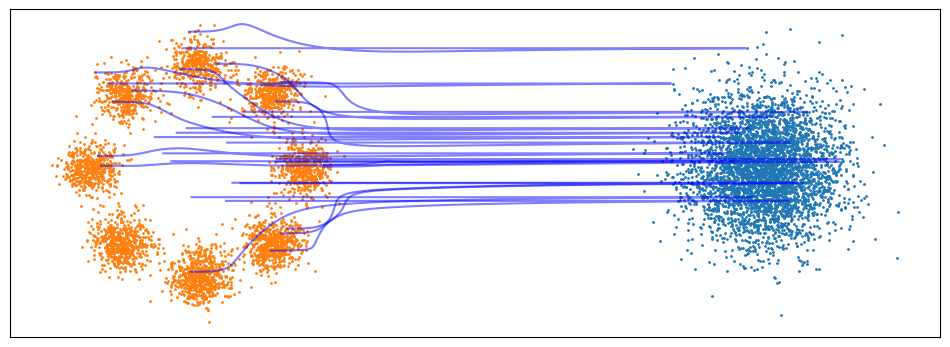

In [54]:
def get_next_marginal(z_t, E_z_t, t, s, denoised_fn):
    def process_xstart(x):
        if denoised_fn is not None:
            # print(denoised_fn)
            x = denoised_fn(x, s)
        if False:# clip_denoised:
            return x.clamp(-1, 1)
        return x
    
    #step 1 do prediction 
    x_ = pred(z_t, t) 
    #x_ = pred(E_z_t, t)
    
    x_start = process_xstart(x_)

    #step 2 get epsilon
    gmm, _ = gamma(t)
    alpha2 = gamma.alpha_2(gmm)
    sigma2 =  gamma.sigma_2(gmm)
    alpha = alpha2 ** 0.5
    sigma = sigma2 ** 0.5

    m_ , _ = transform.get_m_s(x_start, t)

    eps = (z_t - alpha * m_) / sigma
    #eps = (E_z_t - alpha * m_) / sigma

    #step 3 get epsilon s|t
    noise = torch.randn_like(z_t)
    gmm_s, _ = gamma(s)
    alpha2_s = gamma.alpha_2(gmm_s)
    sigma2_s =  gamma.sigma_2(gmm_s)
    alpha_s = alpha2_s ** 0.5
    sigma_s = sigma2_s ** 0.5

    #print(torch.all(gmm == gmm_s), "should be equal")
    #print(torch.all(alpha2 == alpha2_s), "should be equal")
    #print(torch.all(sigma2 == sigma2_s), "should be equal")
    
    m_s , _ = transform.get_m_s(x_start, s)

    #print(gmm_s)
    snr_t = (alpha2/sigma2).double()
    snr_s = (alpha2_s/sigma2_s).double()

    #sigma2_tilde_s_t = (1 -  (snr_t / snr_s)).float() #instead of casting back to float here we can alos cast back only after computing epsilon tilde st
    sigma2_tilde_s_t = -torch.expm1(gmm_s - gmm) #should be in 0-1
    #print(sigma2_tilde_s_t, "sigma2_tilde_s_t")
    sigma2_tilde_s_t = torch.zeros_like(gmm) 
    
    epsilon_tilde_s_t = torch.sqrt(1 - sigma2_tilde_s_t) * eps + (sigma2_tilde_s_t.sqrt()) * noise 
    #print(epsilon_tilde_s_t, "epsilon_tilde_s_t")

    #step 4 get z_s to pass to the next one
    z_s_mean = alpha_s * m_s
    z_s = z_s_mean + sigma_s * epsilon_tilde_s_t

    if torch.all(s == 0):
        z_s = z_s_mean
    
    return z_s, z_s_mean

@torch.no_grad()
def discrete_sampling(
        z: Tensor,
        ts: float,
        tf: float,
        n_steps: int,
        show_pbar: bool=True
):
    bs = z.shape[0]

    dt = (tf - ts) / n_steps
    t_steps = torch.linspace(ts+dt, tf, n_steps-1)
    #print(t_steps, "the idea here is the z_1 is the random noise we atart with and the next sample is z_dt")
    print(t_steps[0], t_steps[-1])
    dt_2 = abs(dt) ** 0.5

    path = [z]
    E_z = z
    pbar = tqdm if show_pbar else (lambda a: a)
    for s in pbar(t_steps):
        s = s.expand(bs, 1)
        #s should go from dt to 1   
        #print(s+dt, t, "t should larger than dt")
        if True:
            z, E_z = get_next_marginal(z_t=z, E_z_t=E_z, t=s-dt, s=s, denoised_fn=None)
        else:
            z, E_z = get_next_marginal(z_t=E_z, E_z_t=E_z, t=s-dt, s=s, denoised_fn=None)

        path.append(z)

    t_steps = torch.cat([torch.tensor([0]), t_steps], dim=0)
    return z, (t_steps, torch.stack(path))


bs = 2 ** 12

z = torch.randn(bs, 2)

_, (t_steps, path) = discrete_sampling(z=z, ts=1, tf=0, n_steps=300)

print(len(t_steps))
print(len(path))

print(path[-1])
viz_2d_path(t_steps, path, n_lines=16, color="blue")

### ODE sampling

that means we need just f(z,t,eps)|eps=F(z,t,)înverser. We have, \\
\begin{align}
    z = F(\varepsilon, t, x),
\end{align}
and specifically in the ndm/vdm case, \\
\begin{align}
    z = \alpha F(x, t) + \sigma \varepsilon
\end{align}
The ODE drift is given by \\
\begin{align}
    dz = f_{tilde}(z_t, t, x\_)dt
\end{align}
Where 
\begin{align}
    f_{tilde}(z_t, t, x\_) &= d/dt F(eps, t, x) \\
    &= alpha' * m + alpha * dm + sigma' * eps
\end{align}

\begin{align}
f &= \dot{\alpha} F + \alpha \dot{F} + \frac{\dot{\sigma}}{\sigma} (z - \alpha F) 
\end{align}


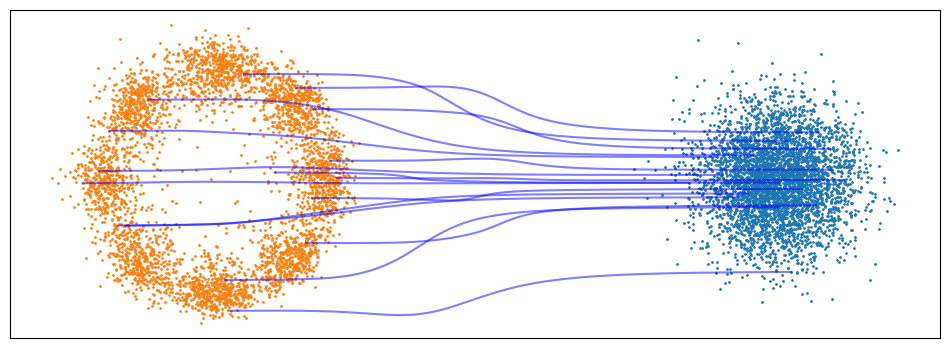

In [ ]:
bs = 2 ** 12

z = torch.randn(bs, 2)


def ode(z_in, t_in):
    gmm, d_gmm = gamma(t_in)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5
    sigma = sigma_2 ** 0.5

    #eta = vol_eta(t_in)

    x_ = pred(z_in, t_in)

    (m_, _), (d_m_, _) = transform(x_, t_in)

    eps = (z_in - alpha * m_) / sigma
    alpha_prime = - d_gmm * 0.5 * alpha * (1- alpha_2) 
    sigma_prime = 0.5 * d_gmm * sigma * (1 - sigma_2)
    #dz = -alpha * d_gmm + alpha * d_m_ + sigma * d_gmm * eps
    dz = alpha_prime * m_ + alpha * d_m_ + sigma_prime * eps
    #dz = -alpha_prime + alpha * d_m_ + sigma_prime * eps

    
    return dz, 0


_, (t_steps, path) = solve_sde(sde=ode, z=z, ts=1, tf=0, n_steps=300)

viz_2d_path(t_steps, path, n_lines=16, color="blue")

### Adaptive step size ODE sampling

In [37]:
!pip install torchdiffeq


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


4096
steps taken 2
steps tensor([1., 0.])


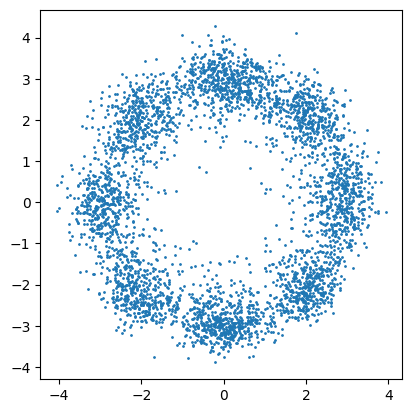

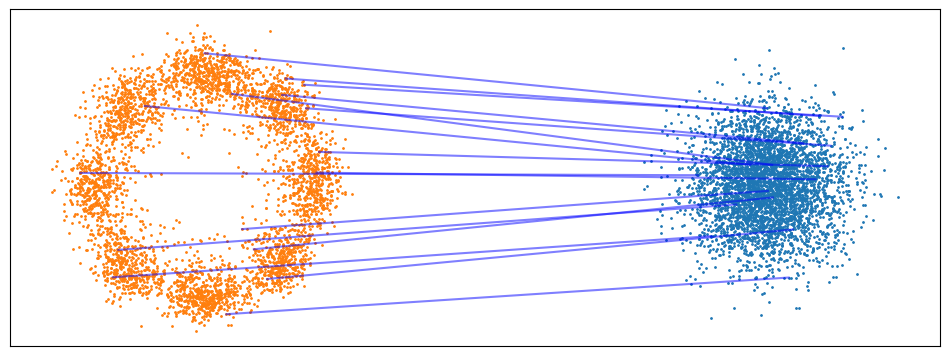

In [ ]:
import torch
from torchdiffeq import odeint

def ode_adaptor(t, z):
    #print(t)
    t = t.expand(z.shape[0], 1)
    #print(z.shape)
    #print(t.shape) # bs x 2, why is this bs by 2??, needs to be bs x 1 where t moves from 1 to 0 over time
    drift, _ = ode(z, t)
    return drift

@torch.no_grad()
def integrate_ode_torch(z0, t_span=(1.0, 0.0), atol=1e-6, rtol=1e-7):
    # Here, we only provide the initial conditions (z0) and the time span (t_span)
    # The solver will automatically select adaptive time steps within the provided range
    t = torch.linspace(1.0, 0.0, 2)  # Reverse time to go from 1 to 0
    # Solve the ODE using RK45 (dopri5 with adaptive step size)
    path = odeint(ode_adaptor, z0, t = t, method='dopri5', atol=atol, rtol=rtol)

     # The solver automatically handles the time steps
    final_state = path[-1]  # Last step of integration

    return final_state, (t, path)

bs = 2 ** 12
print(bs)

z = torch.randn(bs, 2)

final, (t_steps, path) = integrate_ode_torch(z)

print("steps taken", len(path))
print("steps", t_steps)

viz_2d_data(final.detach().numpy())
viz_2d_path(t_steps.detach().numpy(), path.detach().numpy(), n_lines=16, color="blue")

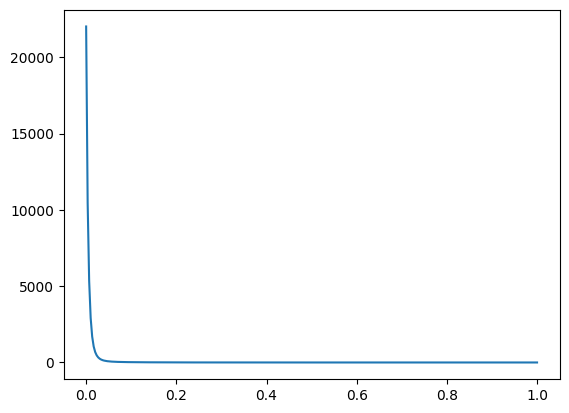

In [30]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, _ = gamma(t)
    alpha2 = gamma.alpha_2(g)
    sigma2 = gamma.sigma_2(g)
    snr = alpha2 / sigma2

    plt.plot(t, snr)
    plt.show()

#clearly t > s implies snr(t) < snr(s)

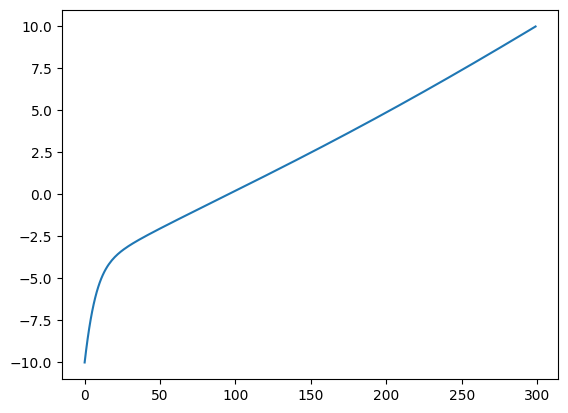

In [31]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, _ = gamma(t)

    plt.plot(g)
    plt.show()

### plotting $\lambda_x$ and snr' for their method

from the vdm paper we know, 
\begin{align}
\mathcal{L}_{\infty} (\mathbf{x}) = -\frac{1}{2} \mathbb{E}_{\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})} \int_0^1 \text{SNR}'(t) \left\| \mathbf{x} - \hat{\mathbf{x}}_{\boldsymbol{\theta}} (\mathbf{z}_t; t) \right\|_2^2 dt,
\end{align}

so if, 
\begin{align}
    \mathcal{L} = \lambda_x \left\| x - \hat{x} \right\|_2^2
\end{align} 
then 
\begin{align}
  \lambda_x = -0.5 * \text{SNR}'(t)
\end{align} 

In [32]:
from torch import nn
import torch
class Sqrt(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x, t):
        # Scale t to simulate a different schedule
        s = (0.99-t) * 0.0001
        output3 = torch.sqrt(1- torch.sqrt(t+s))

        output0 = output3 * x
        output1 = torch.sqrt(torch.sqrt(t + s))
        print("1is it using this code=------------------------------------------------------------")

        #a seperate output for the diffusion loss scaling term
        return output0, output1, output3

def jvp(f, x, v):
    #print(x.dtype)
    #print(v.dtype)
    with torch.inference_mode(False):
        x = x.clone()
        v = v.clone()
        #print(x.requires_grad, "x requires grad")
        #print(v.requires_grad, "v requires grad")
        return torch.autograd.functional.jvp(
            f, x, v,
            create_graph=torch.is_grad_enabled()
        )

def t_dir(f, t):
    return jvp(f, t, torch.ones_like(t))


In [ ]:
x = torch.rand((64,64,128))
affine = Sqrt()

def f(t_in):
    return affine(x, t_in)

t = torch.linspace(0.1, 1, 300)[:, None] #NOTE: snr prime is very large at t=0 so I removed it for visualization
t = t.unsqueeze(-1).unsqueeze(-1)

(m, s, alpha), (dm, ds, dalpha) = t_dir(f, t)

#snr_prime = (-1/2) * ((0.9999*t + 0.000099) ** (-3/2)) * 0.9999
#print(snr_prime)
snr_prime = 2 * alpha * (dalpha * s -alpha * ds) / (s ** 3)
snr_prime = snr_prime.squeeze()
print(snr_prime)
lmdb_x = -0.5 * snr_prime
t = t.squeeze()
#print(snr_prime)
snr_prime = snr_prime.detach().numpy()
lmdb_x = lmdb_x.detach().numpy()
t = t.detach().numpy()

plt.plot(t, snr_prime, label='snr_prime')
plt.plot(t, lmdb_x, label='lmdb_x')
plt.legend()
plt.show()

In [ ]:
class GammaTheirs(Gamma):
    def __init__(self):
        super().__init__()

    def get_gamma(self, t):
        def safe_logit(x, eps=1e-6):
            """
            Stable log( x / (1 - x) ) for x in (0, 1).

            Parameters
            ----------
            x   : torch.Tensor   -- input, any shape
            eps : float          -- clamp width; keeps gradients finite
            """
            x = x.clamp(eps, 1.0 - eps)            # avoid exactly 0 or 1
            return torch.log(x) - torch.log1p(-x)   # log(x) - log(1 - x)
        s = (0.99-t) * 0.0001
        sqrt = torch.sqrt(t+s)
        gamma = safe_logit(sqrt)

        return gamma

gamma = GammaTheirs()

with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]

    g, dg = gamma(t)
    one_over_dg = 1 / (dg)

    plt.plot(t, dg)
    plt.plot(t, g)
    plt.show()

In [ ]:
with torch.no_grad():
    t = torch.linspace(0, 1, 300)[:, None]
    gmm, dgamma = gamma(t)
    alpha_2 = gamma.alpha_2(gmm)
    sigma_2 = gamma.sigma_2(gmm)
    alpha = alpha_2 ** 0.5
    sigma = sigma_2 ** 0.5

    #also get alpha and sigma from the sqrt function and plot them in the same graph as the other alpha and sigma, so make three plots
    sqrt = Sqrt()
    alpha_sqrt, sigma_sqrt, _ = sqrt(torch.tensor(1.), t)

    plt.plot(alpha)
    plt.plot(alpha_sqrt)
    plt.legend(["alpha", "alpha_sqrt"])
    plt.show()
    plt.close()

    plt.plot(sigma) #flag2
    plt.plot(sigma_sqrt)
    plt.legend(["sigma", "sigma_sqrt"])
    plt.show()
    plt.close()

    plt.plot(gmm)
    plt.legend(["gamma"])
    plt.show()
    plt.close()

    plt.plot(dgamma)
    print(dgamma)
    plt.legend(["dgamma"])
    plt.show()
    plt.close()


In [2]:
from typing import List, Union
import re

def postprocess_generation(
    texts: Union[str, List[str]],
    start_token: str = "<s>",
    end_token: str = "</s>"
) -> Union[str, List[str]]:
    """
    Cleans up model-generated text by:
      1. Removing specified start/end tokens
      2. Stripping leading/trailing whitespace
      3. Removing spaces before dots and commas
      4. Removing spaces before and after apostrophes

    Args:
      texts:      A single string or list of strings to clean.
      start_token: Token to remove at the beginning.
      end_token:   Token to remove at the end.

    Returns:
      Cleaned string or list of strings.
    """
    pad_token_count = 0
    def clean(s: str) -> str:
        # 1) Remove start/end tokens
        s = s.replace(start_token, "").replace(end_token, "")
        # 2) Remove spaces before dots and commas
        s = re.sub(r"\s+([.,!?;:])", r"\1", s)
        # 3) Remove spaces around apostrophes
        s = re.sub(r"\s*'\s*", r"'", s)
        # 4) Strip any remaining leading/trailing whitespace

        s = re.sub(r"\b(\w+)\s+n['’]t\b", r"\1n't", s)
        return s.strip()
      
    def remove_pad_tokens(sample, pad_token='PAD'):
        nonlocal pad_token_count
      #print("input to pad token removal", sample)
      
        if isinstance(sample, list):
            # If sample is a list of tokens, remove trailing pad tokens
            while sample and sample[-1] == pad_token:
                sample.pop()
                pad_token_count += 1
            #print("removed pad tokens", sample)
            return " ".join(sample)
        
        elif isinstance(sample, str):
            # If sample is a string, split it into tokens (by whitespace)
            tokens = sample.split()
            #print("split tokens",tokens)
            while tokens and tokens[-1] == pad_token:
                tokens.pop()
                pad_token_count += 1  
            return " ".join(tokens)
        
        else:
            #print("nothing was done somehow", sample)
            return sample

    avg_unks = 0
    if isinstance(texts, str):
        for word in texts.split():
            if word == "UNK":
                avg_unks += 1
        print("average unks", avg_unks)
        return clean(remove_pad_tokens(texts)), avg_unks, pad_token_count
    else:
        # If texts is a list, process each string
        for text in texts:
            for word in text.split():
                if word == "UNK":
                    avg_unks += 1
        
        print("average unks", avg_unks/len(texts))
        return [clean(remove_pad_tokens(t)) for t in texts], avg_unks/len(texts), pad_token_count/len(texts)


In [3]:
import torch
from evaluate import load

torch.cuda.empty_cache() 
perplexity = load("perplexity", module_type="metric", keep_in_memory=True)


In [3]:
text = [
"START I told my wife that I need to build six things . So each tending I took a larger UNK from home job . I spent five miles prior to pursue the roles . When I arrived the lights were at home I became sticky and UNK . I decided I would install an extra piece babysitter again ! END PAD PAD PAD"
,"START Mitchell always liked to music in his backyard . He had bought a new grill . The kitchen was always far lower to the chirping . One day , he did not decided to use couples in his backyard . The gas groaned broke a UNK 's vase . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Tina had n't had any very much . She did n't want to listen to her friends . She went to the store to pick more makeup done . The store she went to the liquor store to check it in . When she was done , she got a new UNK . END PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START John was a good rider at his job to be a cashier . One day , he was put in a car with many people . John was then trying to beat his punish UNK . After some UNK , John confronted his boss work . John did n't be able to drive in approval . END PAD PAD PAD PAD PAD PAD"
,"START The kids were coming us for one guests . As she had UNK mother 's possessions , it appeared to be UNK . It was a challenge , but an offers were lined up at the wedding . The children nailed the UNK right at their house dress ! Poor UNK was ready ! END PAD PAD PAD PAD PAD PAD PAD PAD"
,"START UNK was an expert golfer at the Olympics and was bored . He usually tried summer to for his skills . He always ate his own one night for the big event . UNK got a big summer pro and bought the event . He signed up and flew away with the hard all over . END PAD PAD PAD PAD PAD PAD"
,"START Tim felt very very tired . He went online for something to relax around in the morning . He had been drinking and asked all his friends around him . His mother asked him that was coffee . He put it off and went to sleep . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I had to write a research report at work . It was very scary at work . I copied it as it was an UNK and encouraged me to keep it . I tried UNK my report . Finally I printed the deadline paper and turned it in . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Mandy was painting her baby . She looked around and sat how angry at her birth cry . Mandy was incredibly embarrassed about this . She began to let how much the baby patch . Mandy looked down to realize she was too pregnant . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Daisy wants to be the lead of the school play . She spent over several management among her music . Daisy teachers joined the contest and carried her UNK path . Daisy and Lisa kept instantly through the last few years . She did n't get fired , but ultimately cared for the whole event . END PAD PAD PAD PAD PAD PAD"
,"START One day at work saw he only had a big book to read . He took them to the customer and filled it up to Jason . While waiting for the problem he dropped leaves . The customer denied passed . Jason was embarrassed and decided to break into his car . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START My sister posted all of her child . UNK took a photo of her money with him . His wife lost the photo . My friend saw her things away . He has a bad UNK mouse . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START My cat began to get sick . I had to take her to the vet . They had worn her UNK out tests . I happily let them sit in there for hours . I went home to change her pills . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Larry bought a beer . He was nervous about it . He played off diarrhea out for the first ten years . Eventually he broke down . He stopped feeling more bus about it . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"

]
unk=0
pad=0
text, unk, pad = postprocess_generation(text, start_token="START", end_token="END")
print(text)
print(unk, "average unks in the text")
print(pad, "pad tokens removed from the text")

results = perplexity.compute(predictions=text, model_id="gpt2-large", device='cpu', add_start_token=True) #tiiuae/falcon-rw-1b EleutherAI/gpt-j-6b
print(results)

average unks 1.1904761904761905
['I told my wife that I need to build six things. So each tending I took a larger UNK from home job. I spent five miles prior to pursue the roles. When I arrived the lights were at home I became sticky and UNK. I decided I would install an extra piece babysitter again!', "Mitchell always liked to music in his backyard. He had bought a new grill. The kitchen was always far lower to the chirping. One day, he did not decided to use couples in his backyard. The gas groaned broke a UNK's vase.", "Tina hadn't had any very much. She didn't want to listen to her friends. She went to the store to pick more makeup done. The store she went to the liquor store to check it in. When she was done, she got a new UNK.", "John was a good rider at his job to be a cashier. One day, he was put in a car with many people. John was then trying to beat his punish UNK. After some UNK, John confronted his boss work. John didn't be able to drive in approval.", "The kids were coming

  0%|          | 0/2 [00:00<?, ?it/s]

{'perplexities': [187.13345336914062, 147.51162719726562, 39.266136169433594, 67.28607940673828, 143.5286407470703, 110.4848403930664, 46.96653366088867, 58.31488800048828, 94.32778930664062, 202.0181884765625, 86.09739685058594, 127.63613891601562, 40.42232894897461, 103.79421997070312, 50.364627838134766, 79.6460952758789, 55.877559661865234, 129.82334899902344, 126.75245666503906, 106.21500396728516, 216.45233154296875], 'mean_perplexity': np.float64(105.71046120779855)}


In [6]:
text = [
"START Tom had a big test at the end of the week . He had n't studied for the test . He knew he needed to be ready . He tried to study . Tom went to take the test and failed . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Kim really wanted a sports car . But she did n't see how fast it could be . So she decided to buy a sports car . And she got several miles away . And she decided to buy her own sports car . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I went to the store to buy beer . My friend asked if I wanted it . I said I did n't know . My friend told me I was broke . I decided I would see him again next week . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I decided I wanted a new pet . I went to the pet store and looked around . I found the cutest cat that I liked . I picked him up and took him home . I bought the cat for myself . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Allie just moved to a new town . She was nervous about whether she would make any friends . When she got to school she met someone . The girls were very nice and nice . They and Allie became best friends . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Mary woke up feeling ill with a headache . She took some medicine and drank a glass of water . Mary 's medicine always make her feel better . She lied down on the couch and took a nap . When she woke up , she felt much better . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Today I went to the beach with my family . We splashed in the water and went swimming . We swam for ten hours in the water . We also got to see each other with UNK . It was a fun day and I hope I can do it again . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Johnny needed to get a new pair of shoes . His shoes had been broken and worn out . He decided to buy a new pair . He found the perfect pair . He finally found the perfect pair and bought them . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I went to the store to buy some cookies . I found something that was not very tasty . I found a nice box that they both . I bought the cookies and brought them home . My girlfriend loved the new towels . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Three kids were playing on the beach . Three of the kids grabbed a stick and ran toward it . One kid ran over and stole the stick . The other kids felt bad and ran to their parents . The parents went back in and gave them a refund . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Jake was walking home from school . He was feeling hungry after having a rainy day . He stopped by a nearby store to buy a snack . Jake went to the store and bought candy . Jake ate the candy bar on the way home from school . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Charles loved reading the newspaper . He was obsessed with the newspaper . He would read the local and national news each morning . Charles loved the feeling of reading the paper . He began a national news program in the world . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Rex is driving home . He hears a smoke coming from under his engine . He decides to pull over . He lifts the hood and finds white smoke everywhere . He calls a tow truck for help with his car . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Tim was always afraid of heights . His friends decided to take him on a ride . Tim did n't think it was fun . He tried to get on it for the whole ride . Tim realized it was n't so bad , after that . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I was very tired today . I nearly fell asleep . Yet however I drank coffee . I decided to have a cup . I then got my energy back . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Neil was on his first train ride . He took a train to the city of UNK . There , he saw all the famous sights . He also enjoyed the street speed . Neil thought they were the most beautiful city on earth ! END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Every year the UNK family went to the same mansion every summer . This summer they went to a new aquarium . The UNK had a blast . At the end they loved it . We ca n't wait to go back next year . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Eddie was scared of the dark . His mother always told him not to stay in his room at night . One day , Eddie was playing football with his friends . Eddie fell down and broke his arm . Eddie 's mother tried to get him out of the room . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START A man saw a unique sport on a TV sport . He then did the sport to search for curling . He became UNK with the game . He loved the unique UNK of the game . He became a lifetime curling fan . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Ray wanted to buy a sports car . But he did n't have enough money . So he saved up his money and got a sports car . But he did n't have enough to pay for it . Ray regret not buying the car . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I came home from work one evening . I was hungry because I did n't know what to cook . I got in my car and drove to the store . I went to the store and found dog food . I ordered some delicious food and was very happy . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Karl was a poor man . One day he played the lottery . He decided not to do so did it again . The same did not win . Karl stopped being a poor millionaire . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START The local soccer team had a great game . They were asked to play in their first game . They had an keeping goal . They practiced for hours each day . By the end of the game , they were exhausted and celebrated ! END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Omar was taking an acting acting class . All of his friends liked acting . Omar looked into the local group . He liked being able to perform other people . Omar stayed with the other group instead as an adult . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Dan was UNK what to wear for Halloween this year . Dan decided he would go as Mario Mario and his brother as UNK . In addition , Dan would dress his son up as well as well . Dan was surprised to see his son dressed as UNK . Dan loved the costumes that they decided to wear for Halloween . END"
,"START The pitcher threw the ball . It was heading for the batter . The batter ducked . The ball missed him . The batter never felt UNK . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START The man was too sensitive . He saw a counselor . The counselor gave him some advice . The man did n't like the advice . The man asked for a different counselor . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START A man wanted to learn how to play chess . He decided he would take a chess class to help him better . He practiced every day for a week for a year . He did it so much that he would practice every day a week . He became a very good player . END PAD PAD PAD PAD PAD PAD PAD"
,"START Tom was a bright student . Tom was a senior in high school . Tom knew he could not afford to go to college . Tom decided to become a UNK . Tom lived a very successful life and UNK his knowledge . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START It was Julie 's birthday . She was excited about it . Her boyfriend invited her to a restaurant . When she saw him , he got down on one knee . He proposed to her . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START The family went on a vacation to UNK Studios . They saw many Amish UNK . They bought great souvenirs . They also saw souvenirs . It had been the best time of their life at Disneyland ! END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Allie went to the market to mail . When she got there , she realized she had no stamps . She did n't know what to do . She decided to buy some stamps . Then , he gave her stamps . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Michael wanted to be a chef . He decided to go to culinary school . He went to culinary school . He did well in his classes . Then he opened his own restaurant . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Sarah felt so sick yesterday . She could not get up to go home from school . Her mom decided to take her to the doctor for help . The doctor gave her some medicine medicine to help her . After two days Sarah felt much better . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Today we had a family throw house . The kids all had a lot of fun . I got to throw a few of them . It was a lot of fun . I do n't think I will ever do it again . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I woke up one morning to go to work . I threw on my clothes and quickly left my house . I drove down the highway as fast as I could . When I made it to my house , I checked into my office . I got in my car and drove back home . END PAD PAD PAD PAD PAD PAD"
,"START Stanley is playing soccer . His team is down by 2 goals . He goes in the zone . He scores 3 goals to win the game . He is carried off the field as a champion . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Elizabeth is a very curious person . She loved to try everywhere she goes . One day she was walking when she saw a spider in the air . It was very big and ended up on her hands . Elizabeth then went to the doctor to get rid of the spider . END PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Ellie was UNK . She had terrible cramps . She told her mom about her UNK . Her mom gave her some UNK and hot tea . Soon Ellie 's UNK cramps cleared up . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Tim wanted to find a strong bottle of dragons . His father took him to a local zoo at the local UNK exhibit . Tim used a metal detector to find animals . At the end of the day , Tim 's father came home . Tim was thrilled to see how useful his father was . END PAD PAD PAD PAD PAD"
,"START Harold spent all morning raking leaves . He raked them in a big pile . He put them all in a pile in his yard . He jumped into a big pile . All the leaves and leaves flew everywhere . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START My friends and I decided to take a romantic trip to the beach . We loaded up the car and drove one to the car . We drove to the dock and stayed on the beach for a whole day . When we got there , there was a huge storm everywhere . We could n't stop laughing while talking to our car"
,"START I stepped outside and saw that my sprinkler were filthy . I went outside to see what the problem was . My sprinkler was covered in mud . I went to the store and bought new hose . I put the water in the hose until the sprinkler were clear . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Carla had skipped her lunch . She was starting to get hungry . Carla left work . On the way home she stopped at a fast food restaurant . Carla ate at the restaurant . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Yesterday I had a craving for a burrito . I went to a local restaurant to get one . When I went to pay , I realized I had no money . I did not know what to do . I did not want to go back there . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Allie was running in a dance competition . She was quite nervous about it . She was afraid she would mess up . Yet when she got on stage she messed up . She ended up losing . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Taylor ordered a shirt off the internet . The shirt did not fit well . She decided to UNK the shirt . Someone purchased the shirt . Taylor was happy to have her money back . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START James had always wanted to learn to play instrument . He decided to start practicing violin . At first it was difficult . However , eventually he was great at playing the violin . James was happy to be learning instrument . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Rob was taking a trip to a new school . He was nervous because he had no friends . When he arrived , he noticed another girl sitting next to him . Rob decided to ask the girl . The girl was very friendly to Rob and the two became close friends . END PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Jon needed an A on his last test . He studied for two weeks . He got help from a tutor . On the day of the test , he felt confident . He ended with a perfect score ! END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Ted is dancing . He slips and falls on the floor . He breaks his arm on his arm . He breaks his leg . Ted is rushed to the hospital . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Jim was eating sandwiches for lunch . But he did n't feel like going to the store . So he decided to make a sandwich for himself . But at lunch time , he did n't have any money . Jim regret not eating the sandwich . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START We went to the local library . We did not know what to do for the next day . It was full of cat books . We UNK through all the things we could find . We were able to get to our home and make a purchase . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Jake was invited to his friend 's graduation party . When he got there he noticed an empty pair of shoes in the back . Jake knew that it was because his friend did n't know . He called his friend up and told him that it was fine that night . Jake felt terrible and spent the night watching movies . END"
,"START I went to the store to buy eggs . My wife said I wanted to buy some eggs . I bought the UNK of them . We released them all into a UNK . We hid them and tasted very good . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START The boy said the room was haunted . The mom thought it was hilarious . The boy 's mom thought it was really funny . The mom said he wanted to go . The boy did n't want to UNK anymore . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Bianca had dark brown hair . She wanted to make her hair a lighter color . She bought hair dye from the store . She dyed her hair a blonde color . Bianca 's boyfriend complimented her new hair afterwards . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Max was nervous for his chemistry exam . It was cold and he had n't studied for two hours . He tried for many minutes but the test did n't help . Finally , he decided to take the test . He passed the test and he felt relieved . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
]
text, _, _= postprocess_generation(text, start_token="START", end_token="END")
results = perplexity.compute(predictions=text, model_id="tiiuae/falcon-rw-1b", device='cpu', add_start_token=True) #tiiuae/falcon-rw-1b EleutherAI/gpt-j-6b
print(results)

average unks 0.41379310344827586


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?it/s]

{'perplexities': [10.868159294128418, 16.31220054626465, 11.989350318908691, 8.64168930053711, 13.792207717895508, 8.506852149963379, 12.085654258728027, 10.146517753601074, 25.180315017700195, 16.542688369750977, 11.99893569946289, 21.18099594116211, 16.41145133972168, 18.204500198364258, 31.657093048095703, 35.43435287475586, 23.169546127319336, 8.090070724487305, 43.81025314331055, 10.406204223632812, 10.110018730163574, 44.05174255371094, 19.66389274597168, 50.55678176879883, 23.981616973876953, 28.66373634338379, 11.429276466369629, 14.414450645446777, 22.569578170776367, 11.295294761657715, 55.49177932739258, 13.514093399047852, 8.033015251159668, 13.762654304504395, 10.03055477142334, 6.937510967254639, 11.69965648651123, 13.547033309936523, 22.5582332611084, 38.53615951538086, 15.547877311706543, 13.988253593444824, 13.26729679107666, 12.64626407623291, 5.669920921325684, 14.038884162902832, 29.774702072143555, 16.217844009399414, 11.379673957824707, 16.049108505249023, 16.5121

In [4]:
text = [
"START Tom was an attractive employee . He worked very much and UNK . He wanted to fix his relationships . He bought a laptop very UNK and UNK UNK to the UNK . Tom used his flexibility to increase setting on appropriate decisions . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START My test was becoming very shaped . I decided I would go to the library . I stayed for a long time . I studied for 2 exams . I was tired and went to sleep . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START UNK was a great DJ . He painted many different UNK song at everybody . UNK eventually had to share the UNK . The people at the party knew UNK were too UNK . UNK stood and complimented the loss of his success . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I had just got a new phone . The problem was that I did n't have the UNK online . I was so happy until I made it to a online bus . The bus came right I used a problem and liked it . After that we did safely have the entire bus . END PAD PAD PAD PAD PAD PAD PAD"
,"START The man was hungry a milkshake . He poured himself a soda . There was a lot of loose blood in their UNK . He had to clean the dogs and walked . They concluded some UNK . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START UNK did n't like his car after work today . Yesterday he was driving to work when he heard a rumble . He picked out the door and closed the door . As his home shut , he thought he heard a loud noise . UNK the rain had blown off . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Blake was always excited about his car . He had just started putting it from work . So when he set it up , he could n't move it . Blake had to call his father to help him get it back down . Blake was so happy he could successfully move down his car . END PAD PAD PAD PAD PAD PAD"
,"START UNK and Jen loved going to a UNK in Ohio . When they kids were in school UNK wore their dinners . She thought they saw UNK and loved them together . One night , they all had a terrible UNK . The parents were so grateful that UNK said they could was more good . END PAD PAD PAD PAD PAD PAD"
,"START One day I was walking home from work . I noticed a man looking on a weird blue accent . As I walked to get the UNK , I realized it was swelling . I checked my eyes and it ran away . I was found out my boss when I got home . END PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Sam was invited to go to a concert to meet a friend . He asked the friend why he was not an American girl . The friend explained that the industry were too UNK . The friend told Sam \" a special person for on a stage . Sam was shocked and felt that she was not UNK . END PAD PAD PAD"
,"START Jane had a new job when she worked at . Her co - worker asked her in to show her off . As she did n't know she went into a laptop and they were on . And soon she realized she heard them . By the time she got home and saw the UNK fell off the desk . END PAD PAD"
,"START Tom was riding on his motorcycle . It started to rain . The park had to close down . Tom broke under the tree and put them down . He went to the store and bought some screws . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Andre wanted to make a hobby . Unfortunately the app on his phone was really slow . He raised thousands of dollars to change it there . He was able to get a school because of the lease . Andre ended up making money with money to grab a new phone . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Tom and his girlfriend went to Montana on a weekend . They started all day in a mountain summit . Tom saw a lot of fish , but he decided to take a long time . When they arrived at the top they were amazed at how delicious they were there . Tom was very scared and ran away from his girlfriend ."
,"START UNK had a very dirty UNK . UNK she liked it very clean . One day , she could not find the green green match . She decided to buy it in the blue store . Now , UNK 's her own UNK . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Sarah was making a cake . She saw a one that had bought at the counter . Sarah picked up the milk and put it into a bowl . She took it from the blender and poured it into the glass . The slices was covered in flour . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START John wanted to play the guitar for his band . He decided to have a big microphone of what he was given . He invited his friends over to a party show . They all scheduled to try to meet the band . Then , an agent came in and hired him on his first play . END PAD PAD PAD PAD PAD"
,"START Today is John 's birthday ! His mom said he is going to make a cake for his birthday . John 's mom decided to take his family and friends for her birthday . They ate a cake and a party . John was very happy with his gifts . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START UNK wanted to go out for his old town with no car in his one . He had to work around early friends , to go and they could n't work . UNK went to every place with friends but none of his friends knew . One night a man went to join and no one had with own friends . They had"
,"START Tommy was little so he wanted a horse . On his birthday his parents bought him the one . Tommy went into his room . Finally he talked to his parents . His parents got him a horse and Tommy loved him ! END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Allie went on a trip . She walked to the park . When she went she packed up the clothes . At the end she was wearing something . Finally , she hit the waterfall . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START I did not have play concerts during this summer . My sister convinced me to try a Fenway League chess event . The UNK was UNK . It was difficult to pay , and the fluffy line is in UNK . I loved the concert and had my food set . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Today took my seven year old son to a retirement party . We sat down at our house . We played board games . I won 10 games for each second chess strategy . My wife said I will like UNK games . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START It had rained one evening while in Maine . When the family woke up one kids , they were scared . A blackout had n't been long so it was late for snow ! The family cried and went to walk in the storm . When they finally came , they was filled with joy ! END PAD PAD PAD PAD PAD PAD"
,"START Jack decided to treat his best friend 's dog on the day . He wanted to take his dog out to his dog like UNK . He drove a dog UNK to get across the country . When they arrived , he was very amazed by the UNK . They had truly had a great time with their UNK for a dog one"
,"START I woke up an morning cold of food . I noticed the truck landing off to it in the wilderness . My cat , had a UNK bird off the road to capture one of the UNK . One of the UNK was dead , and he was UNK . He told me that I could stay him until that night . END"
,"START Rick and Jay were playing dodgeball in the park for ice cream . It was UNK 's Day , so they decided to go get a UNK of ice cream . Unfortunately they went to get something dollar . There was Lego in the air ! UNK ran away because there was no UNK . END PAD PAD PAD PAD PAD PAD PAD"
,"START UNK got a rumble UNK . She followed her friend Rob . They became UNK when they got married . Rob took her to the hospital . The woman looked very happy . END PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD"
,"START Paul went to his friend 's house Sunday afternoon . This Tuesday they played games all night . Paul does n't have a job unless he left his car to find pizza . While UNK , he began to fall asleep . Now he has a big bruise on his face , and says he needs out . END PAD PAD PAD PAD"
]

text, unk, pad = postprocess_generation(text, start_token="START", end_token="END")
print(text)
print(unk, "average unks in the text")
print(pad, "pad tokens removed from the text")
results = perplexity.compute(predictions=text, model_id="gpt2-large", device='cpu', add_start_token=True) #tiiuae/falcon-rw-1b EleutherAI/gpt-j-6b
print(results)

average unks 1.8620689655172413
['Tom was an attractive employee. He worked very much and UNK. He wanted to fix his relationships. He bought a laptop very UNK and UNK UNK to the UNK. Tom used his flexibility to increase setting on appropriate decisions.', 'My test was becoming very shaped. I decided I would go to the library. I stayed for a long time. I studied for 2 exams. I was tired and went to sleep.', 'UNK was a great DJ. He painted many different UNK song at everybody. UNK eventually had to share the UNK. The people at the party knew UNK were too UNK. UNK stood and complimented the loss of his success.', "I had just got a new phone. The problem was that I didn't have the UNK online. I was so happy until I made it to a online bus. The bus came right I used a problem and liked it. After that we did safely have the entire bus.", 'The man was hungry a milkshake. He poured himself a soda. There was a lot of loose blood in their UNK. He had to clean the dogs and walked. They concluded 

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'perplexities': [121.89408874511719, 33.362823486328125, 97.57294464111328, 54.75191879272461, 87.47362518310547, 36.16057205200195, 26.50275993347168, 72.06678009033203, 45.04884719848633, 40.115028381347656, 57.88966751098633, 34.49130630493164, 53.262847900390625, 25.771310806274414, 46.426307678222656, 30.123945236206055, 43.59115219116211, 16.773225784301758, 66.9968490600586, 28.084489822387695, 43.33932113647461, 108.44245910644531, 84.28963470458984, 59.30564880371094, 44.34724426269531, 81.77711486816406, 51.092655181884766, 72.46405029296875, 49.69183349609375], 'mean_perplexity': np.float64(55.62449836730957)}
